In [1]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
happiness2015 = pd.read_csv("happiness2015.csv")
happiness2016 = pd.read_csv("happiness2016.csv")
happiness2017 = pd.read_csv("happiness2017.csv")
happiness2018 = pd.read_csv("happiness2018.csv")
happiness2019 = pd.read_csv("happiness2019.csv")
health2016 = pd.read_csv("health_expenditure2016.csv")
population2020 = pd.read_csv("population2020.csv")
unemployment2019 = pd.read_csv("unemployment2019.csv")
ecfree = pd.read_csv("economic freedom2015-16.csv")
gdp = pd.read_csv("gdp.csv", encoding = "ISO-8859-1", engine='python')

In [3]:
happiness20156 = pd.merge(happiness2015, happiness2016, on = "Country", how = "outer", suffixes = (" 2015", " 2016"))
happiness20178 = pd.merge(happiness2017, happiness2018, on = "Country", how = "outer", suffixes = (" 2017", " 2018"))
happiness = pd.merge(happiness20156, happiness20178, on = "Country", how = "outer")
happiness2019
happiness = pd.merge(happiness, happiness2019, on = "Country", how = "outer")
happiness = happiness.rename(columns={"Happiness Score":"Happiness Score 2019"})

In [4]:
happiness_pop = pd.merge(population2020, happiness, on = "Country", how = "inner")
happiness_pop

,Country,Population,Density (P/Km²),Region,Happiness Score 2015,Happiness Score 2016,Happiness Score 2017,Happiness Score 2018,Happiness Score 2019
0,China,"1,438,207,241",153,Eastern Asia,5.140,5.245,5.273,5.246,5.191
1,India,"1,377,233,523",464,Southern Asia,4.565,4.404,4.315,4.190,4.015
2,United States,"330,610,570",36,North America,7.119,7.104,6.993,6.886,6.892
3,Indonesia,"272,931,713",151,Southeastern Asia,5.399,5.314,5.262,5.093,5.192
4,Pakistan,"219,992,900",287,Southern Asia,5.194,5.132,5.269,5.472,5.653
...,...,...,...,...,...,...,...,...,...
150,Luxembourg,"623,861",242,Western Europe,6.946,6.871,6.863,6.910,7.090
151,Suriname,"585,561",4,Latin America and Caribbean,6.269,6.269,NaN,NaN,NaN
152,Malta,"441,308","1,380",Western Europe,6.302,6.488,6.527,6.627,6.726
153,Belize,"396,120",17,NaN,NaN,5.956,5.956,5.956,NaN


In [5]:
happ_health2016 = pd.merge(happiness2016, health2016, on = "Country", how = "inner")
happ_health2016 = happ_health2016.dropna()
happ_health2016

,Country,Happiness Score,Percent Health Expenditure of GDP,Health Expenditure Per capita USD 2016
0,Denmark,7.526,13.7,5565.6
3,Switzerland,7.509,29.6,9836.0
4,Iceland,7.501,16.9,5063.6
5,Norway,7.498,14.5,7477.9
6,Finland,7.413,20.4,4117.3
...,...,...,...,...
143,Rwanda,3.515,6.4,48.1
144,Benin,3.484,43.5,30.4
145,Afghanistan,3.360,77.4,57.2
146,Togo,3.303,50.4,38.8


In [6]:
unemployment2019
happ_unemploy = pd.merge(happiness, unemployment2019, on = "Country", how = "inner")
happ_unemploy

,Country,Region,Happiness Score 2015,Happiness Score 2016,Happiness Score 2017,Happiness Score 2018,Happiness Score 2019,Unemployment 2015,Unemployment 2016,Unemployment 2017,Unemployment 2018,Unemployment 2019
0,Switzerland,Western Europe,7.587,7.509,7.494,7.487,7.480,4.80,4.92,4.80,4.71,4.58
1,Iceland,Western Europe,7.561,7.501,7.504,7.495,7.494,3.98,2.98,2.74,2.70,2.84
2,Denmark,Western Europe,7.527,7.526,7.522,7.555,7.600,6.17,6.18,5.74,4.97,4.91
3,Norway,Western Europe,7.522,7.498,7.537,7.594,7.554,4.30,4.68,4.16,3.80,3.35
4,Canada,North America,7.427,7.404,7.316,7.328,7.278,6.91,7.00,6.34,5.83,5.56
...,...,...,...,...,...,...,...,...,...,...,...,...
139,Belize,NaN,NaN,5.956,5.956,5.956,NaN,7.58,7.00,6.59,6.51,6.41
140,Somalia,NaN,NaN,5.440,5.151,4.982,4.668,11.62,11.55,11.41,11.28,11.35
141,Namibia,NaN,NaN,4.574,4.574,4.441,4.639,20.88,23.35,21.57,19.88,20.27
142,South Sudan,NaN,NaN,3.832,3.591,3.254,2.853,12.57,12.50,12.36,12.23,12.24


In [7]:
#happ_ecfree = pd.merge("ecfree20156", "happiness", on = "Country", how = "inner")

In [8]:
happ_gdp = pd.merge(happiness, gdp, on = "Country", how = "inner")
happ_gdp

,Country,Region,Happiness Score 2015,Happiness Score 2016,Happiness Score 2017,Happiness Score 2018,Happiness Score 2019,Economy (in Millions)
0,Switzerland,Western Europe,7.587,7.509,7.494,7.487,7.480,"678,965.00"
1,Iceland,Western Europe,7.561,7.501,7.504,7.495,7.494,"24,488.00"
2,Denmark,Western Europe,7.527,7.526,7.522,7.555,7.600,"329,866.00"
3,Norway,Western Europe,7.522,7.498,7.537,7.594,7.554,"399,489.00"
4,Canada,North America,7.427,7.404,7.316,7.328,7.278,"1,647,120.00"
...,...,...,...,...,...,...,...,...
139,Belize,NaN,NaN,5.956,5.956,5.956,NaN,"1,863.00"
140,Somalia,NaN,NaN,5.440,5.151,4.982,4.668,"7,052.00"
141,Namibia,NaN,NaN,4.574,4.574,4.441,4.639,"13,254.00"
142,South Sudan,NaN,NaN,3.832,3.591,3.254,2.853,"2,904.00"


In [9]:
happ_gdp = pd.merge(happiness, gdp, on = "Country", how = "inner")

happ_gdp


,Country,Region,Happiness Score 2015,Happiness Score 2016,Happiness Score 2017,Happiness Score 2018,Happiness Score 2019,Economy (in Millions)
0,Switzerland,Western Europe,7.587,7.509,7.494,7.487,7.480,"678,965.00"
1,Iceland,Western Europe,7.561,7.501,7.504,7.495,7.494,"24,488.00"
2,Denmark,Western Europe,7.527,7.526,7.522,7.555,7.600,"329,866.00"
3,Norway,Western Europe,7.522,7.498,7.537,7.594,7.554,"399,489.00"
4,Canada,North America,7.427,7.404,7.316,7.328,7.278,"1,647,120.00"
...,...,...,...,...,...,...,...,...
139,Belize,NaN,NaN,5.956,5.956,5.956,NaN,"1,863.00"
140,Somalia,NaN,NaN,5.440,5.151,4.982,4.668,"7,052.00"
141,Namibia,NaN,NaN,4.574,4.574,4.441,4.639,"13,254.00"
142,South Sudan,NaN,NaN,3.832,3.591,3.254,2.853,"2,904.00"


In [10]:
cloro_data = happ_gdp.copy()
happ_bin_data = happ_gdp.copy()
gdp_bin_data = happ_gdp.copy()

In [11]:
happ_gdp['Economy (in Millions)'] = happ_gdp['Economy (in Millions)'].str.replace(',' , '').astype(float)

In [12]:
del cloro_data["Economy (in Millions)"]
cloro_data["Average Happiness score"] = cloro_data.mean(axis=1, skipna = True)
del cloro_data["Happiness Score 2015"]
del cloro_data["Happiness Score 2016"]
del cloro_data["Happiness Score 2017"]
del cloro_data["Happiness Score 2018"]
del cloro_data["Happiness Score 2019"]



In [13]:
cloro_data.replace('United States', "United States of America", inplace = True)
cloro_data.replace('Tanzania', "United Republic of Tanzania", inplace = True)
#cloro_data.replace('Democratic Republic of Congo', "Democratic Republic of the Congo", inplace = True)
cloro_data.replace('Congo (Kinshasa)', "Republic of the Congo", inplace = True)
cloro_data.replace('Serbia', "Republic of Serbia", inplace = True)



In [14]:
pd.options.display.max_rows

60

In [15]:
m = folium.Map()
m

In [16]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'


In [17]:
folium.Choropleth(
    geo_data=country_shapes,
    name='choropleth Happiness',
    data=cloro_data,
    columns=['Country', 'Average Happiness score'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    nan_fill_color='white'
).add_to(m)
#no Greenland data
m

In [18]:
gdp_ = happ_gdp[happ_gdp["Economy (in Millions)"]<1647120.0]
gdp_["Economy (tens of billions)"]= gdp_["Economy (in Millions)"].divide(10000)
happ19_data = gdp_["Happiness Score 2019"]
gdp_
gdp_data=gdp_["Economy (tens of billions)"]

/Users/jamescadigan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
gdp_

,Country,Region,Happiness Score 2015,Happiness Score 2016,Happiness Score 2017,Happiness Score 2018,Happiness Score 2019,Economy (in Millions),Economy (tens of billions)
0,Switzerland,Western Europe,7.587,7.509,7.494,7.487,7.480,678965.0,67.8965
1,Iceland,Western Europe,7.561,7.501,7.504,7.495,7.494,24488.0,2.4488
2,Denmark,Western Europe,7.527,7.526,7.522,7.555,7.600,329866.0,32.9866
3,Norway,Western Europe,7.522,7.498,7.537,7.594,7.554,399489.0,39.9489
5,Finland,Western Europe,7.406,7.413,7.469,7.632,7.769,252302.0,25.2302
...,...,...,...,...,...,...,...,...,...
139,Belize,NaN,NaN,5.956,5.956,5.956,NaN,1863.0,0.1863
140,Somalia,NaN,NaN,5.440,5.151,4.982,4.668,7052.0,0.7052
141,Namibia,NaN,NaN,4.574,4.574,4.441,4.639,13254.0,1.3254
142,South Sudan,NaN,NaN,3.832,3.591,3.254,2.853,2904.0,0.2904


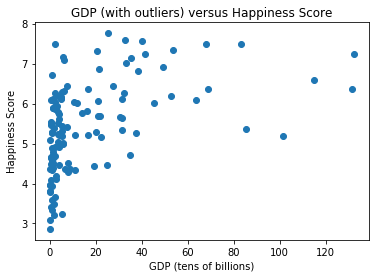

In [22]:
plt.scatter(gdp_data,happ19_data)
plt.ylabel('Happiness Score')
plt.xlabel('GDP (tens of billions)')
plt.title("GDP (with outliers) versus Happiness Score")
plt.show()

In [23]:
quartiles = gdp_["Economy (in Millions)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(upper_bound)


504055.75


In [24]:
gdp_clean = happ_gdp[happ_gdp["Economy (in Millions)"]<504055.75]
gdp_clean["Economy (tens of billions)"]= gdp_clean["Economy (in Millions)"].divide(10000)
gdp_clean = gdp_clean.dropna(how="any")
gdp = gdp_clean["Economy (tens of billions)"]
happ19 = gdp_clean["Happiness Score 2019"]

/Users/jamescadigan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Linear Regression line: y = 0.04x +4.96
r^2 value is 0.24


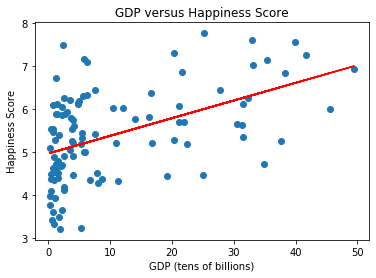

In [35]:
plt.scatter(gdp,happ19)
plt.ylabel('Happiness Score')
plt.xlabel('GDP (tens of billions)')
plt.title("GDP versus Happiness Score")

g_slope, g_int, g_r, g_p,  g_std_err = st.linregress(gdp,happ19)

g_eq = "Linear Regression line: y = " + str(round(g_slope,2)) + "x +" + str(round(g_int,2))
print(g_eq)

print("r^2 value is " +str(round((g_r*g_r),2)))


#Plot Regression and add labels
g_fit= g_slope*gdp+g_int
plt.plot(gdp, g_fit, c="red")
plt.savefig("GDP2")

plt.show()

In [26]:
gdp_l = gdp_clean[gdp_clean["Economy (in Millions)"]<50000]
gdp_h = gdp_clean[gdp_clean["Economy (in Millions)"]>50000]
gdp_h.dropna(how="any")
gdp_l.dropna(how="any")
gdp_low = gdp_l["Economy (tens of billions)"]
happ19_low = gdp_l["Happiness Score 2019"]
gdp_high = gdp_h["Economy (tens of billions)"]
happ19_high = gdp_h["Happiness Score 2019"]

Linear Regression line: y = 0.29x +4.44
r^2 value is 0.17


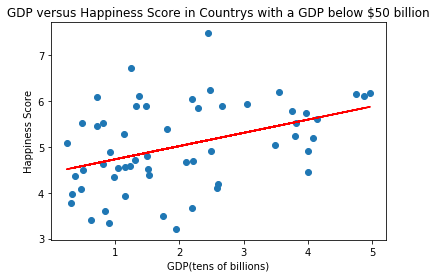

In [34]:
plt.scatter(gdp_low,happ19_low)
plt.ylabel('Happiness Score')
plt.xlabel('GDP(tens of billions)')
plt.title("GDP versus Happiness Score in Countrys with a GDP below $50 billion")


low_slope, low_int, low_r, low_p,  low_std_err = st.linregress(gdp_low.astype(float),happ19_low.astype(float))

low_eq = "Linear Regression line: y = " + str(round(low_slope,2)) + "x +" + str(round(low_int,2))
print(low_eq)

print("r^2 value is " +str(round((low_r*low_r),2)))


#Plot Regression and add labels
low_fit= low_slope*gdp_low+low_int
plt.plot(gdp_low, low_fit, c="red")
plt.savefig("GDP3")

plt.show()


Linear Regression line: y = 0.04x +5.11
r^2 value is 0.19


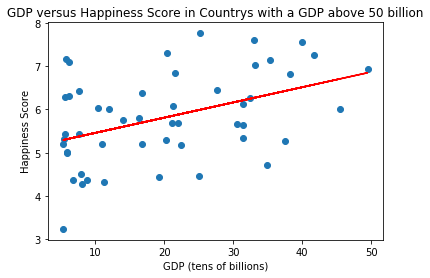

In [36]:
plt.scatter(gdp_high,happ19_high)
plt.ylabel('Happiness Score')
plt.xlabel('GDP (tens of billions)')
plt.title("GDP versus Happiness Score in Countrys with a GDP above 50 billion")

high_slope, high_int, high_r, high_p, high_std_err = st.linregress(gdp_high.astype(float),happ19_high.astype(float))

high_eq = "Linear Regression line: y = " + str(round(high_slope,2)) + "x +" + str(round(high_int,2))
print(high_eq)

print("r^2 value is " +str(round((high_r*high_r),2)))


#Plot Regression and add labels
high_fit= high_slope*gdp_high+high_int
plt.plot(gdp_high, high_fit, c="red")


#Save and show
plt.savefig("GDP1")

plt.show()

In [29]:
del happ_bin_data["Economy (in Millions)"]
happ_bin_data["Average Happiness score"] = happ_bin_data.mean(axis=1, skipna = True)
del happ_bin_data["Happiness Score 2015"]
del happ_bin_data["Happiness Score 2016"]
del happ_bin_data["Happiness Score 2017"]
del happ_bin_data["Happiness Score 2018"]
del happ_bin_data["Happiness Score 2019"]

In [30]:
#happ_groupby = happ_bin_data.groupby("Region")


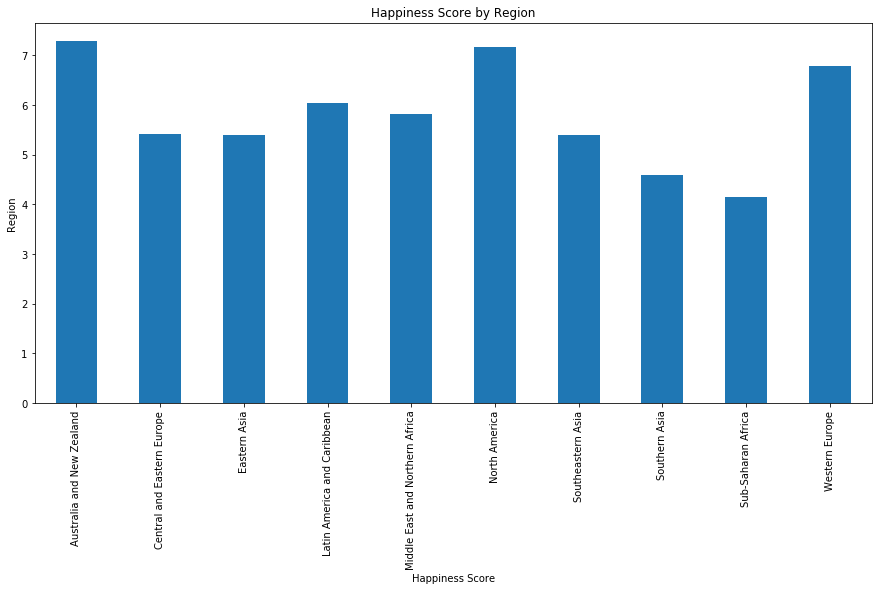

In [33]:
fig, ax = plt.subplots(figsize=(15,7))
happ_bin_data.groupby(['Region']).mean()["Average Happiness score"].plot(kind= "bar", ax=ax)
plt.xlabel("Happiness Score")
plt.ylabel("Region")
plt.title("Happiness Score by Region")
plt.savefig("Happiness Score by Region")

plt.show()

In [30]:
#Chart tonight

In [31]:
gdp_bin_data

,Country,Region,Happiness Score 2015,Happiness Score 2016,Happiness Score 2017,Happiness Score 2018,Happiness Score 2019,Economy (in Millions)
0,Switzerland,Western Europe,7.587,7.509,7.494,7.487,7.480,"678,965.00"
1,Iceland,Western Europe,7.561,7.501,7.504,7.495,7.494,"24,488.00"
2,Denmark,Western Europe,7.527,7.526,7.522,7.555,7.600,"329,866.00"
3,Norway,Western Europe,7.522,7.498,7.537,7.594,7.554,"399,489.00"
4,Canada,North America,7.427,7.404,7.316,7.328,7.278,"1,647,120.00"
...,...,...,...,...,...,...,...,...
139,Belize,NaN,NaN,5.956,5.956,5.956,NaN,"1,863.00"
140,Somalia,NaN,NaN,5.440,5.151,4.982,4.668,"7,052.00"
141,Namibia,NaN,NaN,4.574,4.574,4.441,4.639,"13,254.00"
142,South Sudan,NaN,NaN,3.832,3.591,3.254,2.853,"2,904.00"


In [32]:
gdp_bin_data["Average Happiness score"] = cloro_data.mean(axis=1, skipna = True)
del gdp_bin_data["Happiness Score 2015"]
del gdp_bin_data["Happiness Score 2016"]
del gdp_bin_data["Happiness Score 2017"]
del gdp_bin_data["Happiness Score 2018"]
del gdp_bin_data["Happiness Score 2019"]
gdp_bin_data['Economy (in Millions)'] = gdp_bin_data['Economy (in Millions)'].str.replace(',' , '').astype(float)
gdp_bin_data
print(gdp_bin_data['Economy (in Millions)'].max())
print(gdp_bin_data['Economy (in Millions)'].min())

19485394.0
1068.0


In [35]:
gdp_bin_data
print(gdp_bin_data['Economy (in Millions)'].max())
print(gdp_bin_data['Economy (in Millions)'].min())
gdp_bin_data

19485394.0
1068.0


,Country,Region,Economy (in Millions),Average Happiness score
0,Switzerland,Western Europe,678965.0,7.51140
1,Iceland,Western Europe,24488.0,7.51100
2,Denmark,Western Europe,329866.0,7.54600
3,Norway,Western Europe,399489.0,7.54100
4,Canada,North America,1647120.0,7.35060
...,...,...,...,...
139,Belize,NaN,1863.0,5.95600
140,Somalia,NaN,7052.0,5.06025
141,Namibia,NaN,13254.0,4.55700
142,South Sudan,NaN,2904.0,3.38250


In [34]:
#bins = [1000, 50000, 100000, 500000, 1000000,
#        4999999, 9999999, 49999999]

# Create labels for these bins
#group_labels = ["1 billion to 50 billion", "50 billion to 100 billion", "100 billion to 500 billion", "499 billion to ", "800k to 999k", "1mil to 2mil",
#                "500 billion to 1 tillion", "3mil to 4mil", "4mil to 5mil", "5mil to 50mil"]


# In[ ]:


# Slice the data and place it into bins
#d.cut(gdp_bin_data["views"], bins, labels=group_labels).head()



NameError: name 'ted_df' is not defined